## Conditional graph:

Main Goal: `add_conditional_edges()`

**Objectives:**
- Implement conditional logic to routes to different node.
- Use `START` and `END` nodes.
- Create a `router node` to handle decision making.

**Define State, Nodes Function**

In [1]:
from typing import TypedDict

class AgentState(TypedDict):
    num1 : int
    num2 : int
    operation: str
    result: int

def add_nums(state: AgentState) -> AgentState:
    result = state["num1"] + state["num2"]
    state["result"] = result
    return state

def subtract_nums(state: AgentState) -> AgentState:
    result = state["num1"] - state["num2"]
    state["result"] = result
    return state

Now define a **router node:**, note that this doesnt returns a state dict.

In [2]:
def decide_next_node(state: AgentState) -> str:
    """Decision edge: returns an edge to me mapped in add_conditional_edge"""
    if state["operation"] == "+":
        return "add_operation"
    if state["operation"] == "-":
        return "subtract_operation"

**Now structure a node edges.**

In [3]:
from langgraph.graph import StateGraph

from langgraph.graph import START, END

graph = StateGraph(AgentState)

graph.add_node("add", add_nums)
graph.add_node("subtract", subtract_nums)

# Add a router node, Just a RunnablePassThrough
graph.add_node("router", lambda state: state)  # RunnablePassThrough: Does Nothing

**Add edges**

In [4]:
# Start from router
graph.add_edge(START, "router")

# conditional branching edge
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge : Node
        "add_operation": "add",
        "subtract_operation": "subtract"
    }
)

# Define END:
graph.add_edge("add", END)
graph.add_edge("subtract", END)

**Compile, Preview Invoke**

In [5]:
agent = graph.compile()

agent.invoke({
    "num1": 1,
    "num2": 3,
    "operation": "-"
})

{'num1': 1, 'num2': 3, 'operation': '-', 'result': -2}

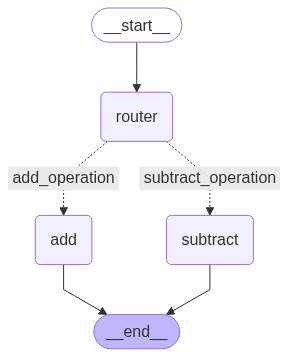

In [7]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))